In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def permutation(lst):
    if len(lst) == 0:
        return []
    if len(lst) == 1:
        return [lst]
 
    l = [] 
    for i in range(len(lst)):
        m = lst[i]
        remLst = lst[:i] + lst[i+1:]
 
        for p in permutation(remLst):
            l.append([m] + p)
    return l

In [3]:
Stack = []
partitions=[]
p=[]
def Partitions(remainder, start_number = 1):
    if remainder == 0 and len(Stack) == 7 and int(max(Stack))<=4:
        a=Stack.copy()
        partitions.append(a)
        p.append(''.join(Stack))
    else:
        for nb_to_add in range(start_number, remainder+1):
            Stack.append(str(nb_to_add))
            Partitions(remainder - nb_to_add, nb_to_add)
            Stack.pop()

In [4]:
Partitions(12)

In [5]:
def partitionset(part):
    import math
    data=list(part)
    p=permutation(data)

    import math
    c=[]
    l=(math.factorial(len(data)))

    for i in range (0,l):
        flag=0
        for j in range (i+1,l):
            a=p[j].copy()
            a.reverse()

            if a==p[i] or p[j]==p[i]:
                flag=1

        if flag==0:
            c.append(p[i])  
        
        
        
    v=len(c[0])
    clen=len(c)
    final=[]
    
    for i in range (0,clen):
        k=c[i]
        if k[0]=='1' and k[v-1]=='1':
            final.append(k)

    flen=len(final)
    remleaf=[]

    for i in range (0,flen):
        y=final[i].copy()
        ylen=len(y)
        u=[]
        for j in range(0,ylen):
            if j==0 or j==(ylen-1):
                u.append(y[j])
            else:
                if y[j]=='1':
                    pass
                else:
                    u.append(y[j])
        remleaf.append(u)

    finalcopy=final.copy()

    remfinal=[]
    rlen=len(remleaf)
    for i in range (0,rlen):
        flag=0
        s=remleaf[i].copy()
        s.reverse()
        for j in range(i+1,rlen):
            if remleaf[i]==remleaf[j] or remleaf[j]==s:
                flag=1
                finalcopy[i]=None
        if flag==0:
            remfinal.append(remleaf[i])

    finalfinal=[]
    for i in finalcopy:
        if i==None:
            pass
        else:
            finalfinal.append(i)
    
    mainchain=[]
    for i in range (0,len(finalfinal)):
        s=""
        for j in range (0,len(finalfinal[i])):
            if finalfinal[i][j]=='1':
                pass
            else:
                s+=finalfinal[i][j]
        mainchain.append(s)
        
        
    for i in range (0,len(mainchain)):
        print("The partition sequence is : ",','.join(finalfinal[i]))
        d=d=len(mainchain[i])-mainchain[i].count('1') ### JESUS JESUS HEREEEEEE
        G=nx.Graph()
        G.add_node(0)
        
        if mainchain[i].count('1')==len(mainchain[i])-1:
            G.add_node(1)
            G.add_edge(0,1)
        
        # MAIN CHAIN
        for j in range(1,len(mainchain[i])):
            G.add_node(j)
            G.add_edge(j,j-1)
            
        # LEAVES    
        for j in range(0,len(mainchain[i])):
            if j==0 or j==len(mainchain[i])-1:
                for k in range(1,int(mainchain[i][j])):
                    G.add_node(d)
                    G.add_edge(j,d)
                    d+=1
                    
            else:
                for k in range(2,int(mainchain[i][j])):
                    G.add_node(d)
                    G.add_edge(j,d)
                    d+=1
                
        
        
        v=G.degree()
        val=2
        fg=len(v)
        nodecount=fg

        color_map = []
        for node in G:
            if node < len(v):
                color_map.append('yellow')

        color_map.append('pink')
        
        lenmain=len(mainchain[i])
        reverse=[]
        for w in range (0,lenmain):
            reverse.append(mainchain[i][lenmain-1-w])
       
        
        import math
        if list(mainchain[i])==reverse:
            for p in range(0,math.floor(lenmain/2)):
                G.add_node(nodecount)
                G.add_edge(nodecount,p)
                G.add_edge(nodecount,p+1)
                G.remove_edge(p,p+1)
                nx.draw(G,with_labels=True,node_color=color_map)
                plt.show()
                G.add_edge(p,p+1)
                G.remove_edge(nodecount,p+1)
                G.remove_edge(nodecount,p)
                G.remove_node(nodecount)
            
            
            # for eq vertex sets
            leaves=0
            cumulativeleaves=0
            vertexnumbering=lenmain
            for p in range(0,math.ceil(lenmain/2)):
                leaves=0
                if p==0 or p==lenmain-1:
                    #the number of leaves would be degree-1
                    leaves=G.degree(p)-1
                    cumulativeleaves+=leaves
                    
                    
                    if G.degree(p)!=1:
                        G.add_node(nodecount)
                        G.add_edge(nodecount,p)
                        G.add_edge(nodecount,vertexnumbering)
                        G.remove_edge(p,vertexnumbering)
                        nx.draw(G,with_labels=True,node_color=color_map)
                        plt.show()
                        G.add_edge(p,vertexnumbering)
                        G.remove_edge(nodecount,vertexnumbering)
                        G.remove_edge(nodecount,p)
                        G.remove_node(nodecount)
                    vertexnumbering+=leaves
                else:
                    #the number of leaves would be degree-2
                    leaves=G.degree(p)-2
                    cumulativeleaves+=leaves
                    if G.degree(p)!=2:
                        G.add_node(nodecount)
                        G.add_edge(nodecount,p)
                        G.add_edge(nodecount,vertexnumbering)
                        G.remove_edge(p,vertexnumbering)
                        nx.draw(G,with_labels=True,node_color=color_map)
                        plt.show()
                        G.add_edge(p,vertexnumbering)
                        G.remove_edge(nodecount,vertexnumbering)
                        G.remove_edge(nodecount,p)
                        G.remove_node(nodecount)
                        
                        
                    vertexnumbering+=leaves
                
                
        else:
            for p in range(0,lenmain-1):
                G.add_node(nodecount)
                G.add_edge(nodecount,p)
                G.add_edge(nodecount,p+1)
                G.remove_edge(p,p+1)
                nx.draw(G,with_labels=True,node_color=color_map)
                plt.show()
                G.add_edge(p,p+1)
                G.remove_edge(nodecount,p+1)
                G.remove_edge(nodecount,p)
                G.remove_node(nodecount)
                
            # for eq vertex sets
            leaves=0
            cumulativeleaves=0
            vertexnumbering=lenmain
            for p in range(0,lenmain):
                leaves=0
                if p==0 or p==lenmain-1:
                    #the number of leaves would be degree-1
                    leaves=G.degree(p)-1
                    cumulativeleaves+=leaves
                    if G.degree(p)!=1:
                        G.add_node(nodecount)
                        G.add_edge(nodecount,p)
                        G.add_edge(nodecount,vertexnumbering)
                        G.remove_edge(p,vertexnumbering)
                        nx.draw(G,with_labels=True,node_color=color_map)
                        plt.show()
                        G.add_edge(p,vertexnumbering)
                        G.remove_edge(nodecount,vertexnumbering)
                        G.remove_edge(nodecount,p)
                        G.remove_node(nodecount)
                    vertexnumbering+=leaves
                else:
                    #the number of leaves would be degree-2
                    leaves=G.degree(p)-2
                    cumulativeleaves+=leaves
                    if G.degree(p)!=2:
                        G.add_node(nodecount)
                        G.add_edge(nodecount,p)
                        G.add_edge(nodecount,vertexnumbering)
                        G.remove_edge(p,vertexnumbering)
                        nx.draw(G,with_labels=True,node_color=color_map)
                        plt.show()
                        G.add_edge(p,vertexnumbering)
                        G.remove_edge(nodecount,vertexnumbering)
                        G.remove_edge(nodecount,p)
                        G.remove_node(nodecount)
                    vertexnumbering+=leaves

The partition sequence is :  1,4,3,1,1,1,1


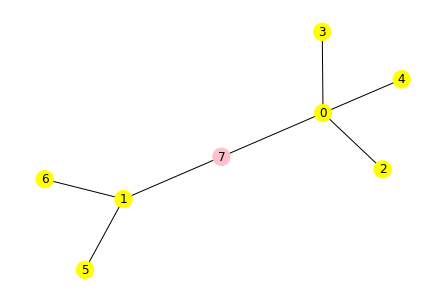

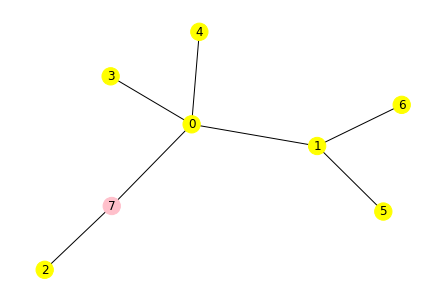

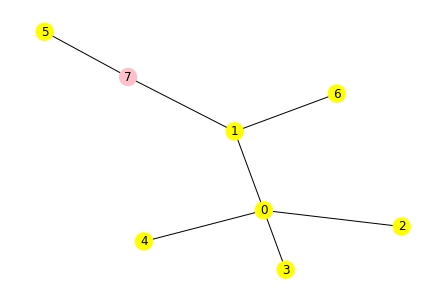

The partition sequence is :  1,2,4,2,1,1,1


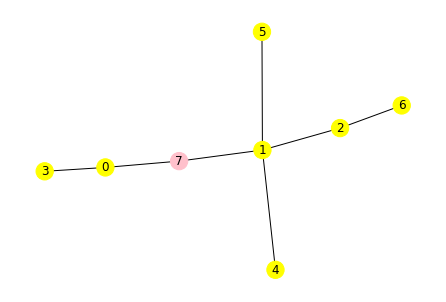

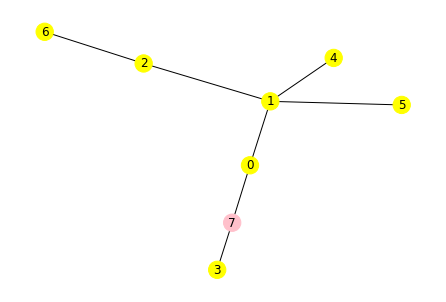

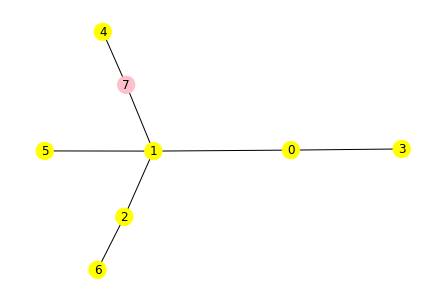

The partition sequence is :  1,4,2,2,1,1,1


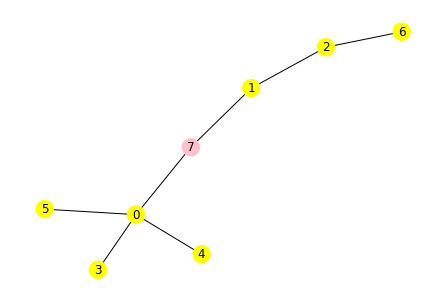

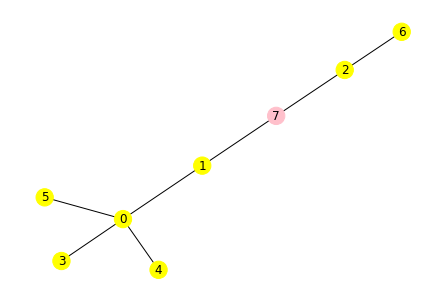

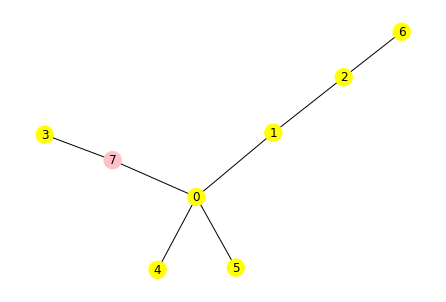

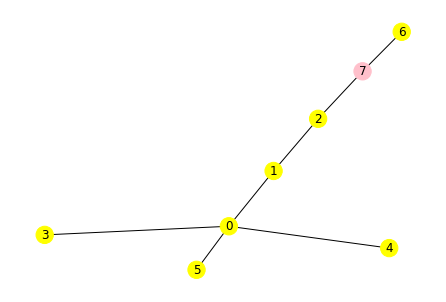

The partition sequence is :  1,3,2,3,1,1,1


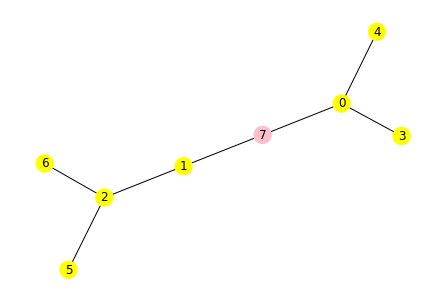

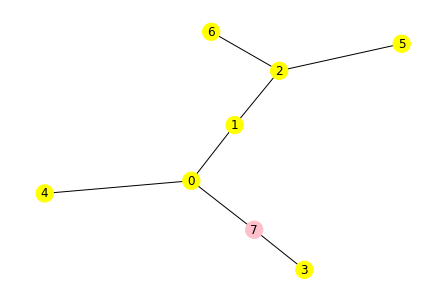

The partition sequence is :  1,3,3,2,1,1,1


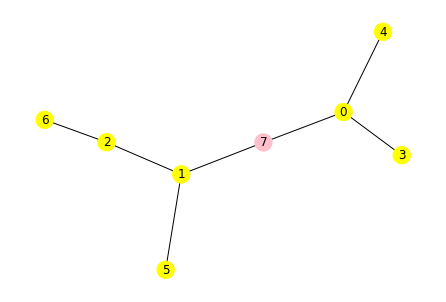

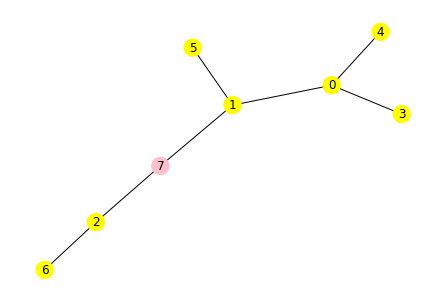

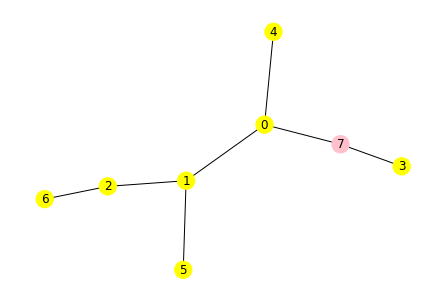

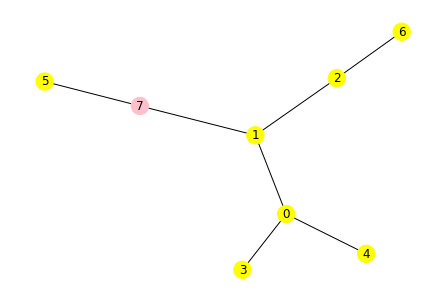

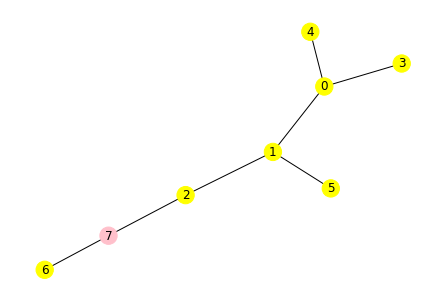

The partition sequence is :  1,2,3,2,2,1,1


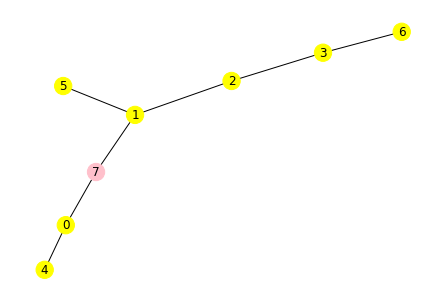

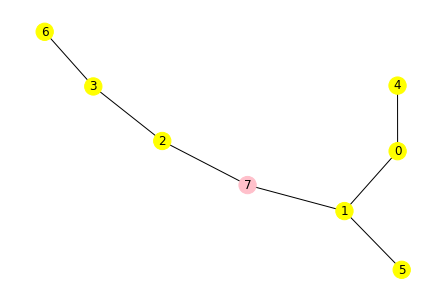

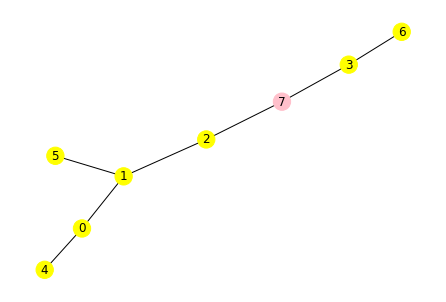

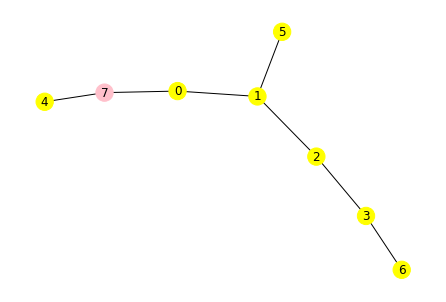

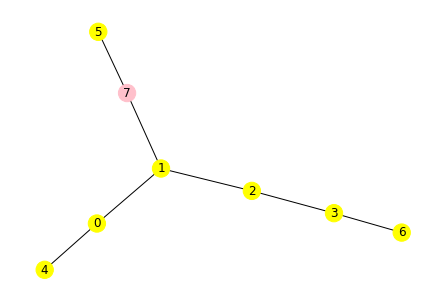

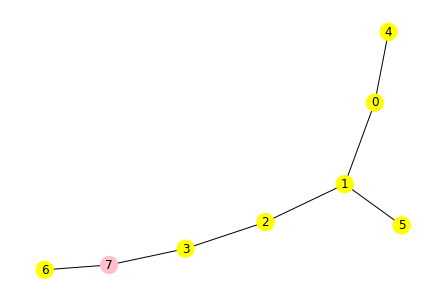

The partition sequence is :  1,3,2,2,2,1,1


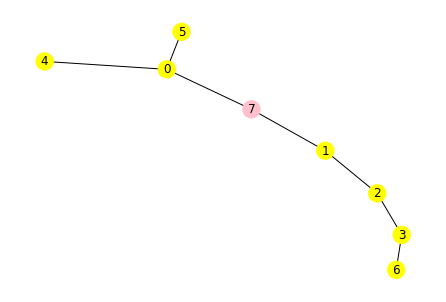

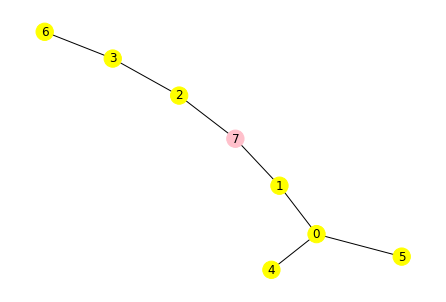

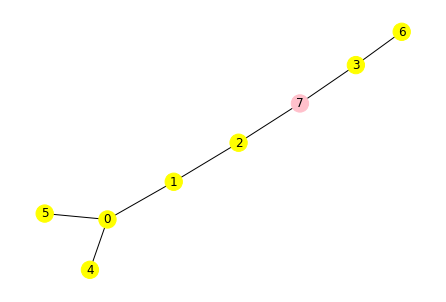

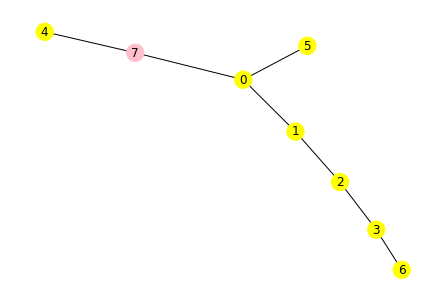

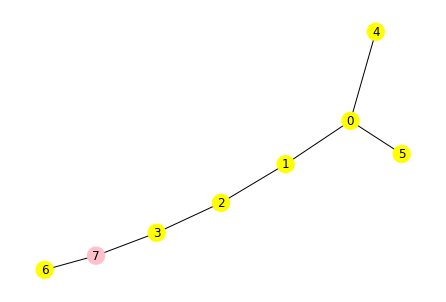

The partition sequence is :  1,2,2,2,2,2,1


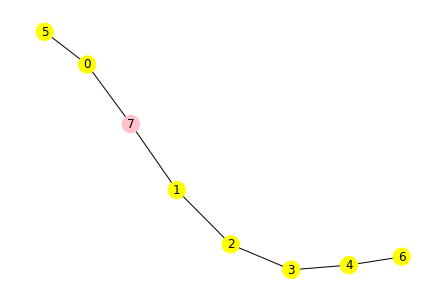

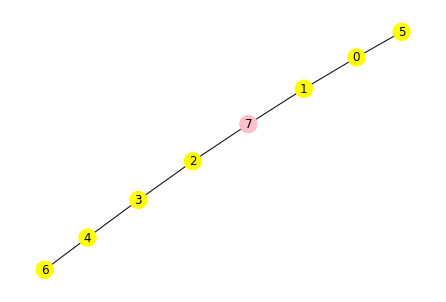

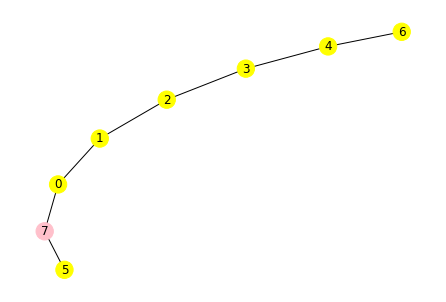

In [6]:
for i in p:
    partitionset(i)